<a href="https://colab.research.google.com/github/aalr007/NavegacionAutonoma/blob/main/LineDetection_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Navegación Autónoma*** </center>
## <center> ***2.1 - Detección de carriles en video usando transformada de Hough*** </center>

### Profesor: Dr. David Antonio Torres
### Alumnos: 
* Andrei García Torres               A
* Aurelio Antonio Lozano Rábago      A01081266
* Jorge Luis Tapia Peñaloza          A
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> 7 de Mayo del 2023 </p>

In [4]:
#importamos las librerias necesarias
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#checamos que podamos abrir el video y checar detalles como el tamaño de cada frame 
vid = cv2.VideoCapture("sample_data/LineDetection2.mp4")
i=1
while (vid.isOpened()):
    ret,frame = vid.read()  #ret boleano que indica lectura correcta del frame. 
                            #Frame es la imagen (pantallazo del video)
#el sifuiente codigo se ejecuta solo una vez en el if, se uso para identificar el tamaño del video y para obtener una imagen para
#obtener la ROI
    if i:
        frame1=frame
        print(frame.shape)
        frame1=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        plt.imshow(frame1)
        i=0
    if ret == True:
        cv2_imshow(frame)
        if cv2.waitKey(1) == 13:
            break
    else:
        break
    
vid.release()
cv2.destroyAllWindows()

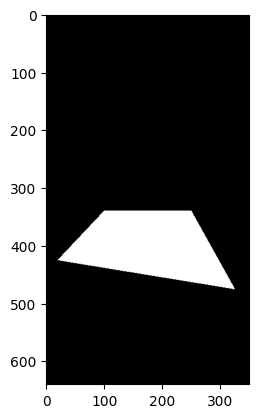

In [7]:
#definimos la region de interes, el video mide 640 x 352
vertices = np.array([[(20,425),(100,340),(250,340),(325,475)]],dtype=np.int32)
frame1=cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
roi_img = np.zeros_like(frame1)
cv2.fillPoly(roi_img, vertices, color=(255, 255, 255))
plt.imshow(roi_img, cmap = "gray")

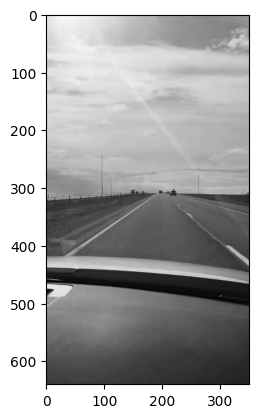

In [8]:
plt.imshow(frame1,cmap = "gray")

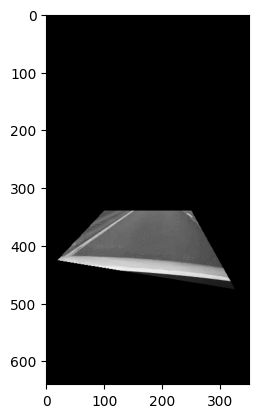

In [9]:
frame_arr =np.asarray(frame1)
img_con_roi = cv2.bitwise_and(frame_arr, roi_img)
plt.imshow(img_con_roi,cmap = "gray")

A partir de la siguiente Celda, se encuentra la tarea

# Instrucciones
1- Genera un video en formato mp4, en el cual se puedan apreciar las líneas de los carriles en una carretera o camino. Puedes buscar el video en alguna página de Internet o generarlo capturando la pantalla y usando alguno de los simuladores de vehículos autónomos que se discuten en el módulo 5. Asegúrate de que el recorrido del auto sea aproximadamente en línea recta y que el video no tenga una duración superior a un minuto.

2- Crea un script de Python en donde se codifiquen todos los pasos necesarios para la detección de carriles, siguiendo la secuencia presentada en los materiales de aprendizaje de este módulo. En caso de que desees desarrollar tu script de Python como Jupyter Notebook, es importante que te asegures que la ejecución del video se presente en una ventana independiente.

3- Agrega los comentarios necesarios a tu script de Python para explicar cada uno de los pasos, entre ellos, la definición de la Región de Interés y el número de líneas generadas por la Transformada de Hough.

4- Verifica que tu script funciona correctamente en el video de prueba y que la detección de carriles sucede en cada uno de los frames.

5- Captura tu pantalla mientras se ejecuta tu script en el video de prueba. Sube tu video a tu canal de YouTube y guarda el enlace.

6- A manera de reporte, crea un documento que incluya tu script con los comentarios y el enlace de tu video en YouTube. Tanto el código como los comentarios son importantes para el documento.

In [ ]:
#ahora que tenemos cargado el video y la region de interes, procedemos con el codígo para la tarea

#definiciones para transformada de Hough
rho =1                #resolucion de rho en pixeles
theta = np.pi/180     #resolucion de theta en radianes
threshold = 60        #minimo numero de votos para ser considerado una linea
min_line_len =100     #minimo numero de pixeles para que se forme una linea
max_line_gap =100     #máximo espacio en pixeles entre segmentos de linea

alpha=1
beta=1
gamma=1


#abrir el video 
vid = cv2.VideoCapture("sample_data/LineDetection2.mp4")

#creamos un objeto para guardar los frames y crear un video
output_path = "output.mp4"
fps = int(vid.get(cv2.CAP_PROP_FPS))
frame_size = (int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)), int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))
codec = "mp4v"      
# Crear objeto VideoWriter
fourcc = cv2.VideoWriter_fourcc(*codec)
out = cv2.VideoWriter(output_path, fourcc, fps, frame_size)



while (vid.isOpened()):
    ret,frame = vid.read()  #ret boleano que indica lectura correcta del frame. 
                            #Frame es la imagen (pantallazo del video)
    if ret == True:
        #mostramos el video en una pantalla a parte hasta que se presione la tecla enter (13) o termine el video
        cv2_imshow(frame)
        if cv2.waitKey(1) == 13:
            break
        
        

        
        #convertimos a escala de grises
        frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #se muestra como arreglo la imagen en escala de grises
        #frame_arr=np.asarray(frame_grey)
        #aplicamos preprocesamiento con filtrado gaussiano con kernel de 3x3
        frame_blur = cv2.GaussianBlur(frame_grey,(3,3),0,0)
        #detectamos lineas con Canny, pixeles debajo de treshold1 no son considerados bordes y por encima de threshold2 son considerados bordes
        frame_canny = cv2.Canny(frame_blur,threshold1=40,threshold2=120)
        
        
        
        #aplicamos la Roi para no procesar mas que la ventana
        #se muestra como arreglo la imagen 
        frame_arr=np.asarray(frame_canny)
        #aplicamos la mascara, para tener solo la imagen en la ROI
        frame_mask = cv2.bitwise_and(frame_arr, roi_img)
        
        #aplicamos transformada de Hough
        lines = cv2.HoughLinesP(frame_mask, rho, theta, threshold, np.array([]), minLineLength=min_line_len,maxLineGap=max_line_gap)
        #creacion del fondo negro del tamaño de la imagen con bordes
        img_lines = np.zeros((frame_mask.shape[0], frame_canny.shape[1],3),dtype=np.uint8)
        #dibujar cada una de las lineas sobre la imagen con fondo negro
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img_lines, (x1,y1),(x2,y2),[0,255,0],7)
        img_lane_lines=cv2.addWeighted(frame, alpha, img_lines, beta, gamma)
        img_lane_lines2=cv2.cvtColor(img_lane_lines, cv2.COLOR_BGR2RGB)
        out.write(img_lane_lines2)

    else:
        break


    
print("done")        
vid.release()
out.release()
cv2.destroyAllWindows()
